## Day 22 Lecture 1 Assignment

In this assignment, we will do some EDA to uncover basic patterns in our datasets. We will be using both the FIFA ratings dataset and the Chicago traffic crash dataset.

In [24]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [ ]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,80,54,41,87,89,86,91,34,27,22


In [ ]:
crash_data.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN
0,JC334993,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JC370822,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JC387098,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JC395195,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,...,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,JC396604,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,...,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We will start with the FIFA dataset, which consists entirely of numeric features (we will ignore the player ID and name). Create a histogram of each numeric column in the dataset. What do you notice about the distributions of scores? Are there any particular distributions that jump out?

In [7]:
soccer_data.select_dtypes('number')

,ID,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,94,84,95,70,90,86,97,93,94,...,94,48,22,94,94,75,96,33,28,26
1,20801,94,84,94,89,81,87,88,81,76,...,93,63,29,95,82,85,95,28,31,23
2,190871,92,79,87,62,84,84,96,88,87,...,82,56,36,89,87,81,94,27,24,33
3,192985,91,93,82,55,92,82,86,85,83,...,91,76,61,87,94,79,88,68,58,51
4,183277,91,81,84,61,89,80,95,83,79,...,80,54,41,87,89,86,91,34,27,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,238813,47,34,38,40,49,25,42,30,34,...,38,46,46,39,52,43,45,40,48,47
16118,243165,47,23,52,52,43,36,39,32,20,...,42,47,16,46,33,43,42,22,15,19
16119,241638,47,25,40,46,38,38,45,38,27,...,45,32,15,48,43,55,41,32,13,11
16120,246268,47,44,50,39,42,40,51,34,32,...,34,33,22,44,47,50,46,20,25,27


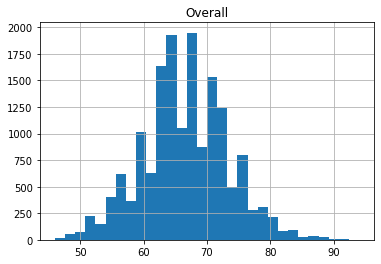

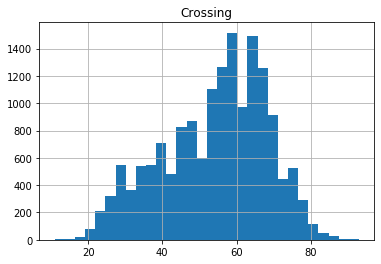

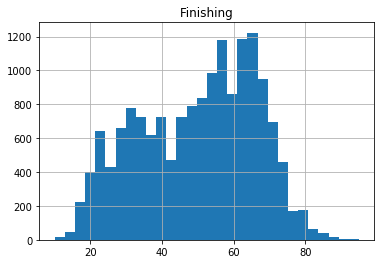

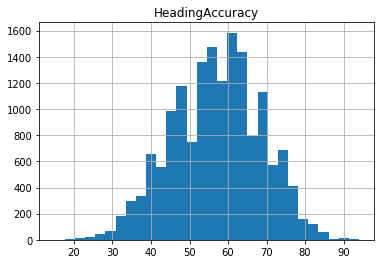

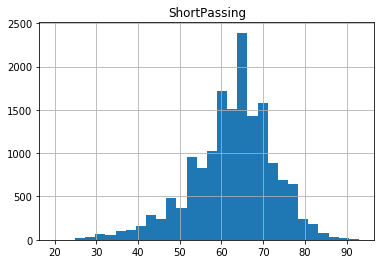

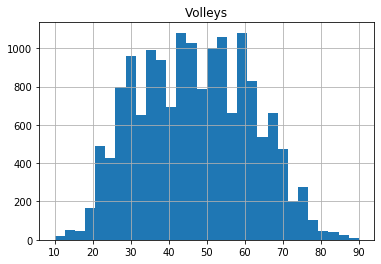

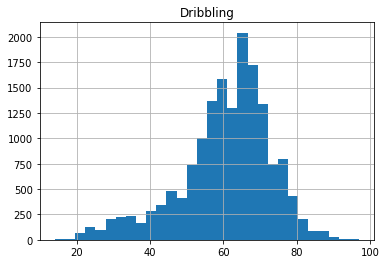

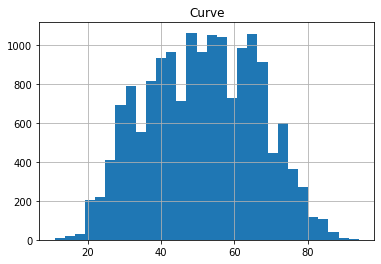

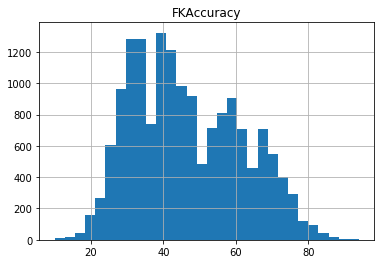

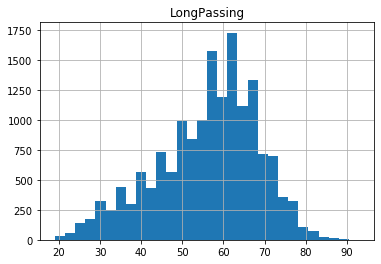

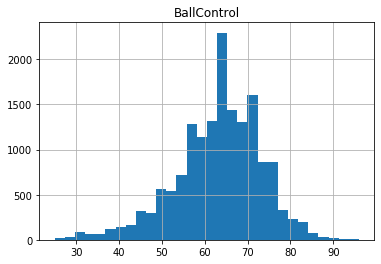

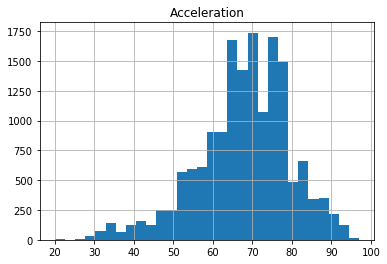

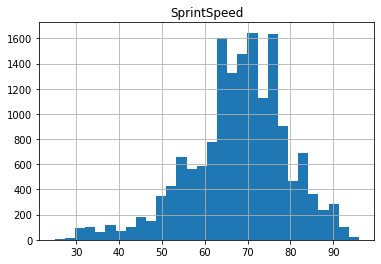

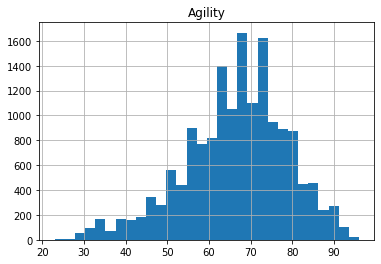

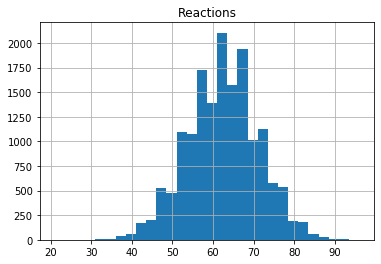

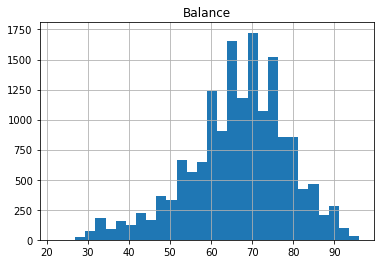

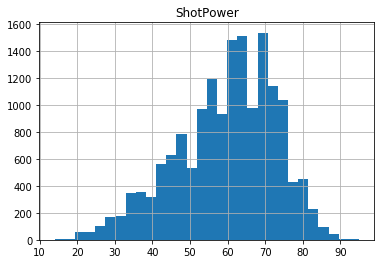

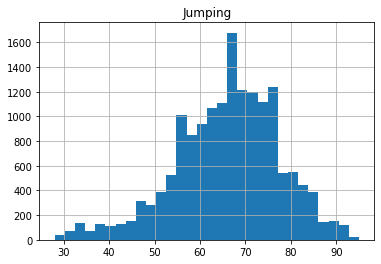

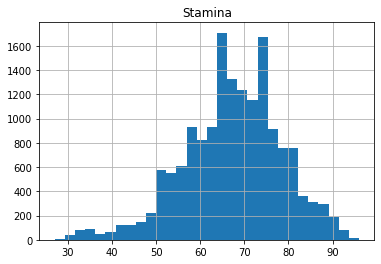

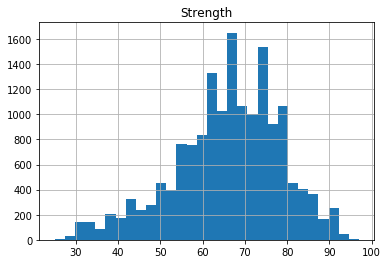

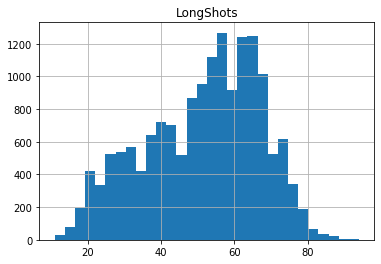

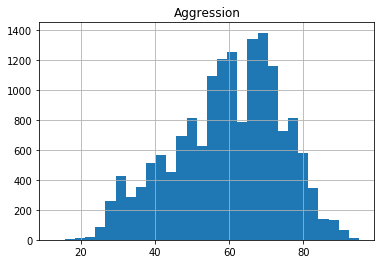

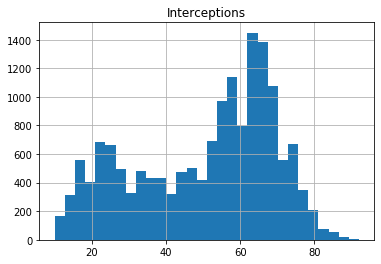

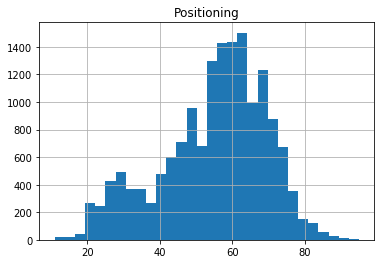

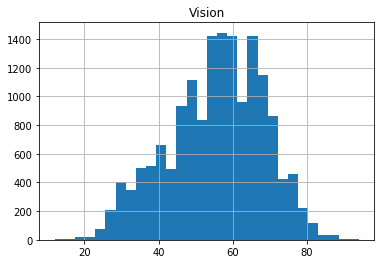

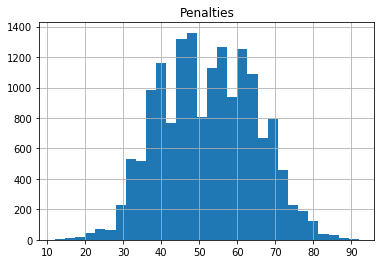

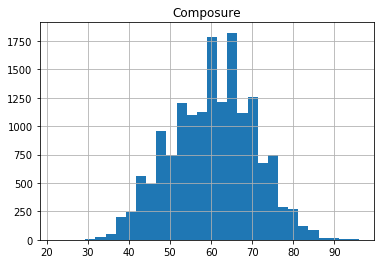

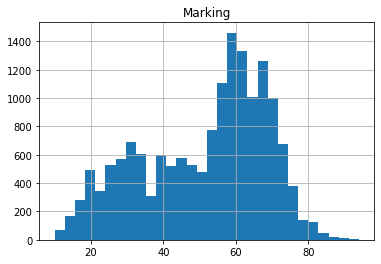

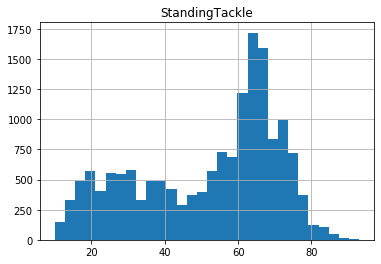

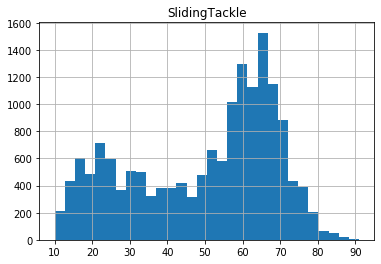

In [6]:
# answer goes here
for col in soccer_data.columns[2:]:
    soccer_data[col].hist(bins = 30)
    plt.title(col)
    plt.show()




Next, generate pairplots between the Overall rating and the other numeric features (i.e. Overall-Crossing, Overall-Finishing....Overall-SlidingTackle). Are the results what you would expect, visually speaking? What are the strongest correlations that jump out?

This dataset has many columns, so it may help to split up the pairwise scatterplots across two or three visuals. In addition, the scatterplots will probably be too crowded to be informative if the full dataset is used, so using a sample of the rows is advisable as well.

In [13]:
soccer_data.sample(500)

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
9467,211581,S. O'Neill,65,46,48,49,64,42,60,59,...,51,67,62,53,54,42,59,62,63,63
7597,184229,J. Thomassen,67,69,40,50,65,36,57,56,...,57,79,62,53,53,50,67,66,62,60
7002,236304,Josema,67,28,23,65,60,34,31,37,...,25,55,62,31,38,48,52,64,73,74
5093,233201,C. Mepham,70,29,22,58,66,24,56,25,...,24,68,68,28,53,42,64,69,72,72
9482,223873,A. Walongwa,65,24,21,67,51,29,27,35,...,25,67,63,39,27,54,58,63,65,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15092,243372,J. Nieva,56,33,28,41,59,32,46,40,...,40,60,48,52,48,38,41,56,52,49
13158,211434,Y. Takahashi,61,45,31,68,55,32,37,41,...,29,46,57,32,40,52,41,58,65,58
278,229237,M. Akanji,81,51,36,75,78,40,67,42,...,45,75,79,33,66,40,76,82,84,80
15336,230069,A. Kigbu,55,29,21,45,48,24,35,25,...,19,57,53,22,33,32,39,52,56,54


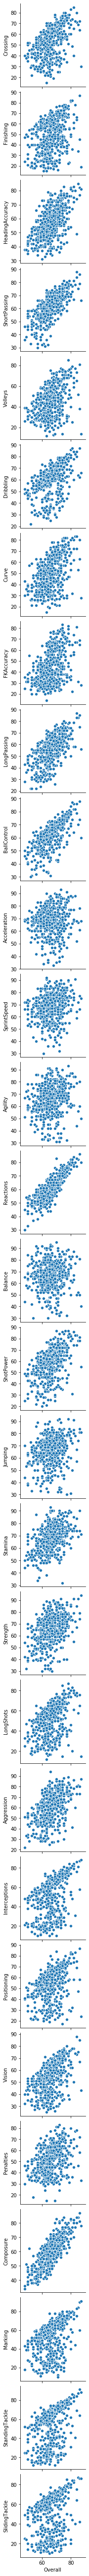

In [22]:
fig = sns.pairplot(data = soccer_data.sample(500), x_vars = 'Overall', y_vars = soccer_data.columns[3:])
fig

In [11]:
# answer goes here

sns.pairplot?



Plot a correlation matrix between all of the numeric columns. A heatmap is an effective way to do so. Which pairs of features stand out as having exceptionally strong correlations, both positive and/or negative?

In [ ]:
# answer goes here





Finally, create a pairplot using the numeric features in the dataset (i.e. scatterplots between pairs of features, rather than between Overall and the other features). Are the graphs visually consistent with what you would expect from the correlation heatmap?

Note: there are too many numeric features to realistically generate a pairplot between all of them, so choose a subset. Choosing a fixed number of consecutive columns is fine (e.g. 10 through 20); you can also use the results of the correlation heatmap to guide your choices of columns. As with the previous exercise, using a sample of rows is recommended.

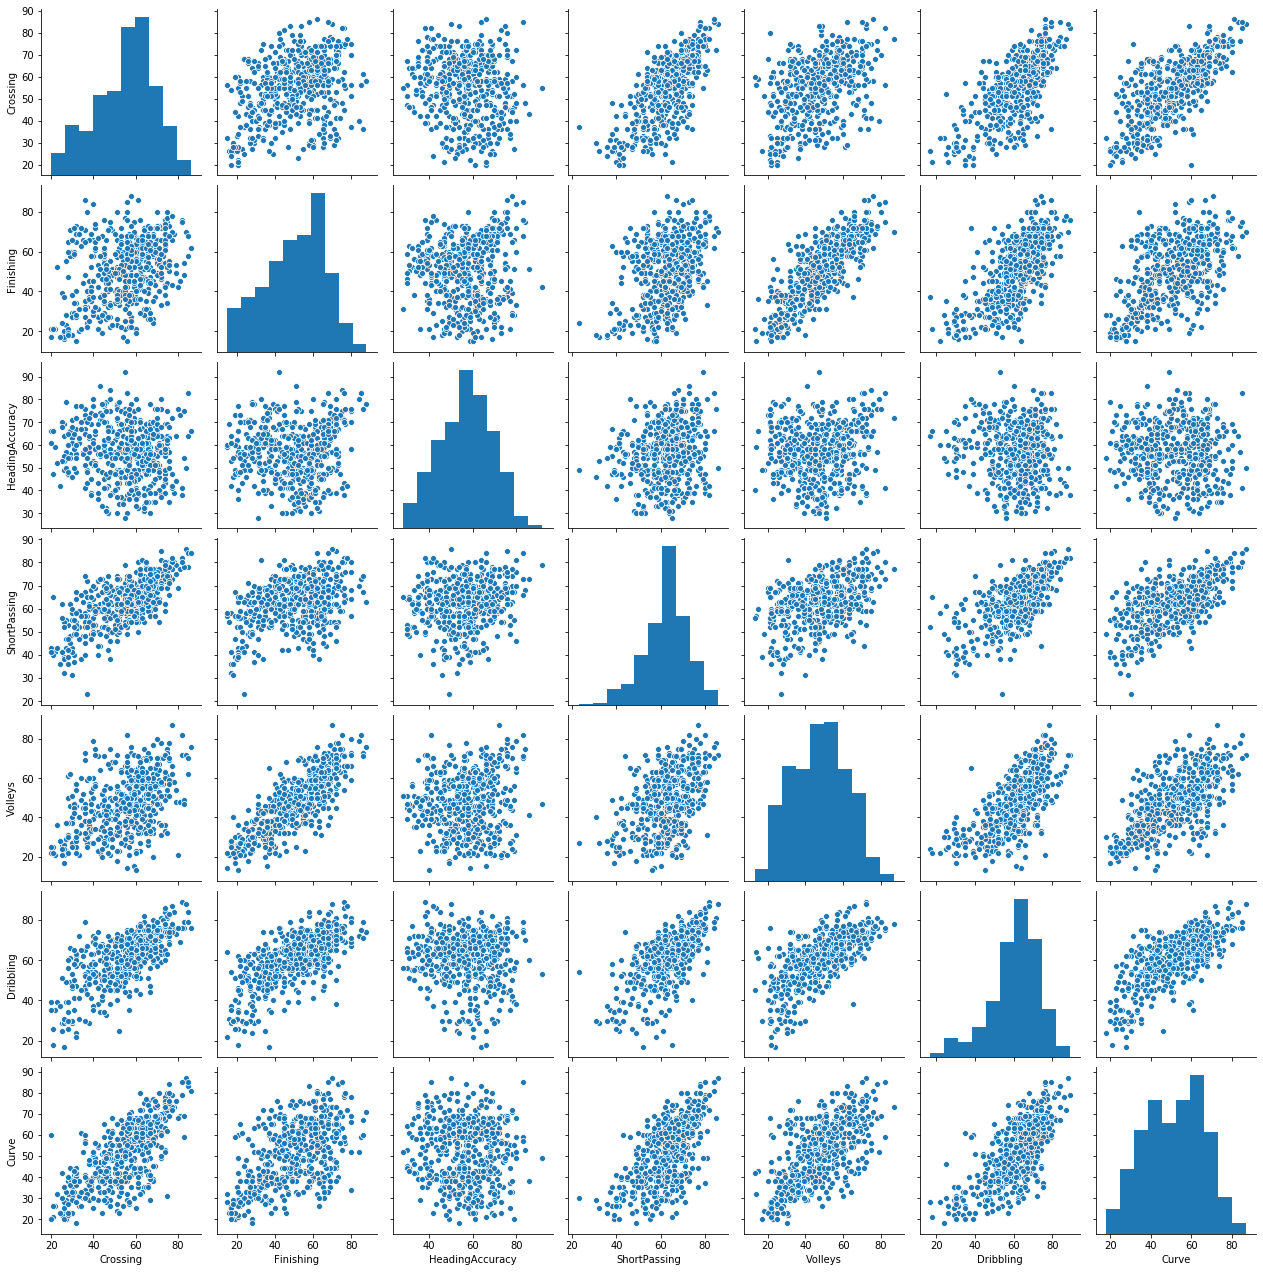

<IPython.core.display.Javascript object>

In [25]:
# answer goes here
fig = sns.pairplot(data = soccer_data.sample(500), x_vars = soccer_data.columns[3:10], y_vars = soccer_data.columns[3:10])
fig




For the Chicago traffic crash data, we will consider the "DAMAGE" column to be the response of interest, and the other columns to be potential features. Most of the features are categorical, so we can use contingency table to identify potentially strong associations between categorical features and our categorical response.

Select one or two categorical variables that you suspect will have a strong relationship with the dollar amount of damages associated with a crash (we will choose TRAFFICWAY_TYPE), and print out the associated contigency table in two different forms:

- Raw data counts
- Percentage of total (i.e. the percentage of "OVER \$1500" for each level of a categorical variable)

Are there any particular categories within a particular feature that are strongly associated with higher damages? Are there any caveats to keep in mind with some of the more extreme values in the contingency table?

In [ ]:
# answer goes here



